In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


import slugger_sw as slug
import pandas as pd

params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
#delete tick margins of both ends of axis.
###patch start###
from mpl_toolkits.mplot3d.axis3d import Axis
if not hasattr(Axis, "_get_coord_info_old"):
    def _get_coord_info_new(self, renderer):
        mins, maxs, centers, deltas, tc, highs = self._get_coord_info_old(renderer)
        mins += deltas / 4
        maxs -= deltas / 4
        return mins, maxs, centers, deltas, tc, highs
    Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new
###patch end###

In [3]:
# sf3 = slug.data2d.ascii('./slug_circ_50_10001.dat')
sf3_1 = slug.data2d.ascii('./slug_circ_100_10001.dat')
sf3_2 = slug.data2d.ascii('./slug_circ_100_10002.dat')
sf3_3 = slug.data2d.ascii('./slug_circ_100_10003.dat')
sf3_4 = slug.data2d.ascii('./slug_circ_100_10004.dat')
# sf3 = slug.data2d.ascii('./slug_circ_200_10001.dat')
# sf3 = slug.data2d.ascii('./slug_circ_400_10001.dat')

In [4]:
vmin = 1.0
vmax = 10.0

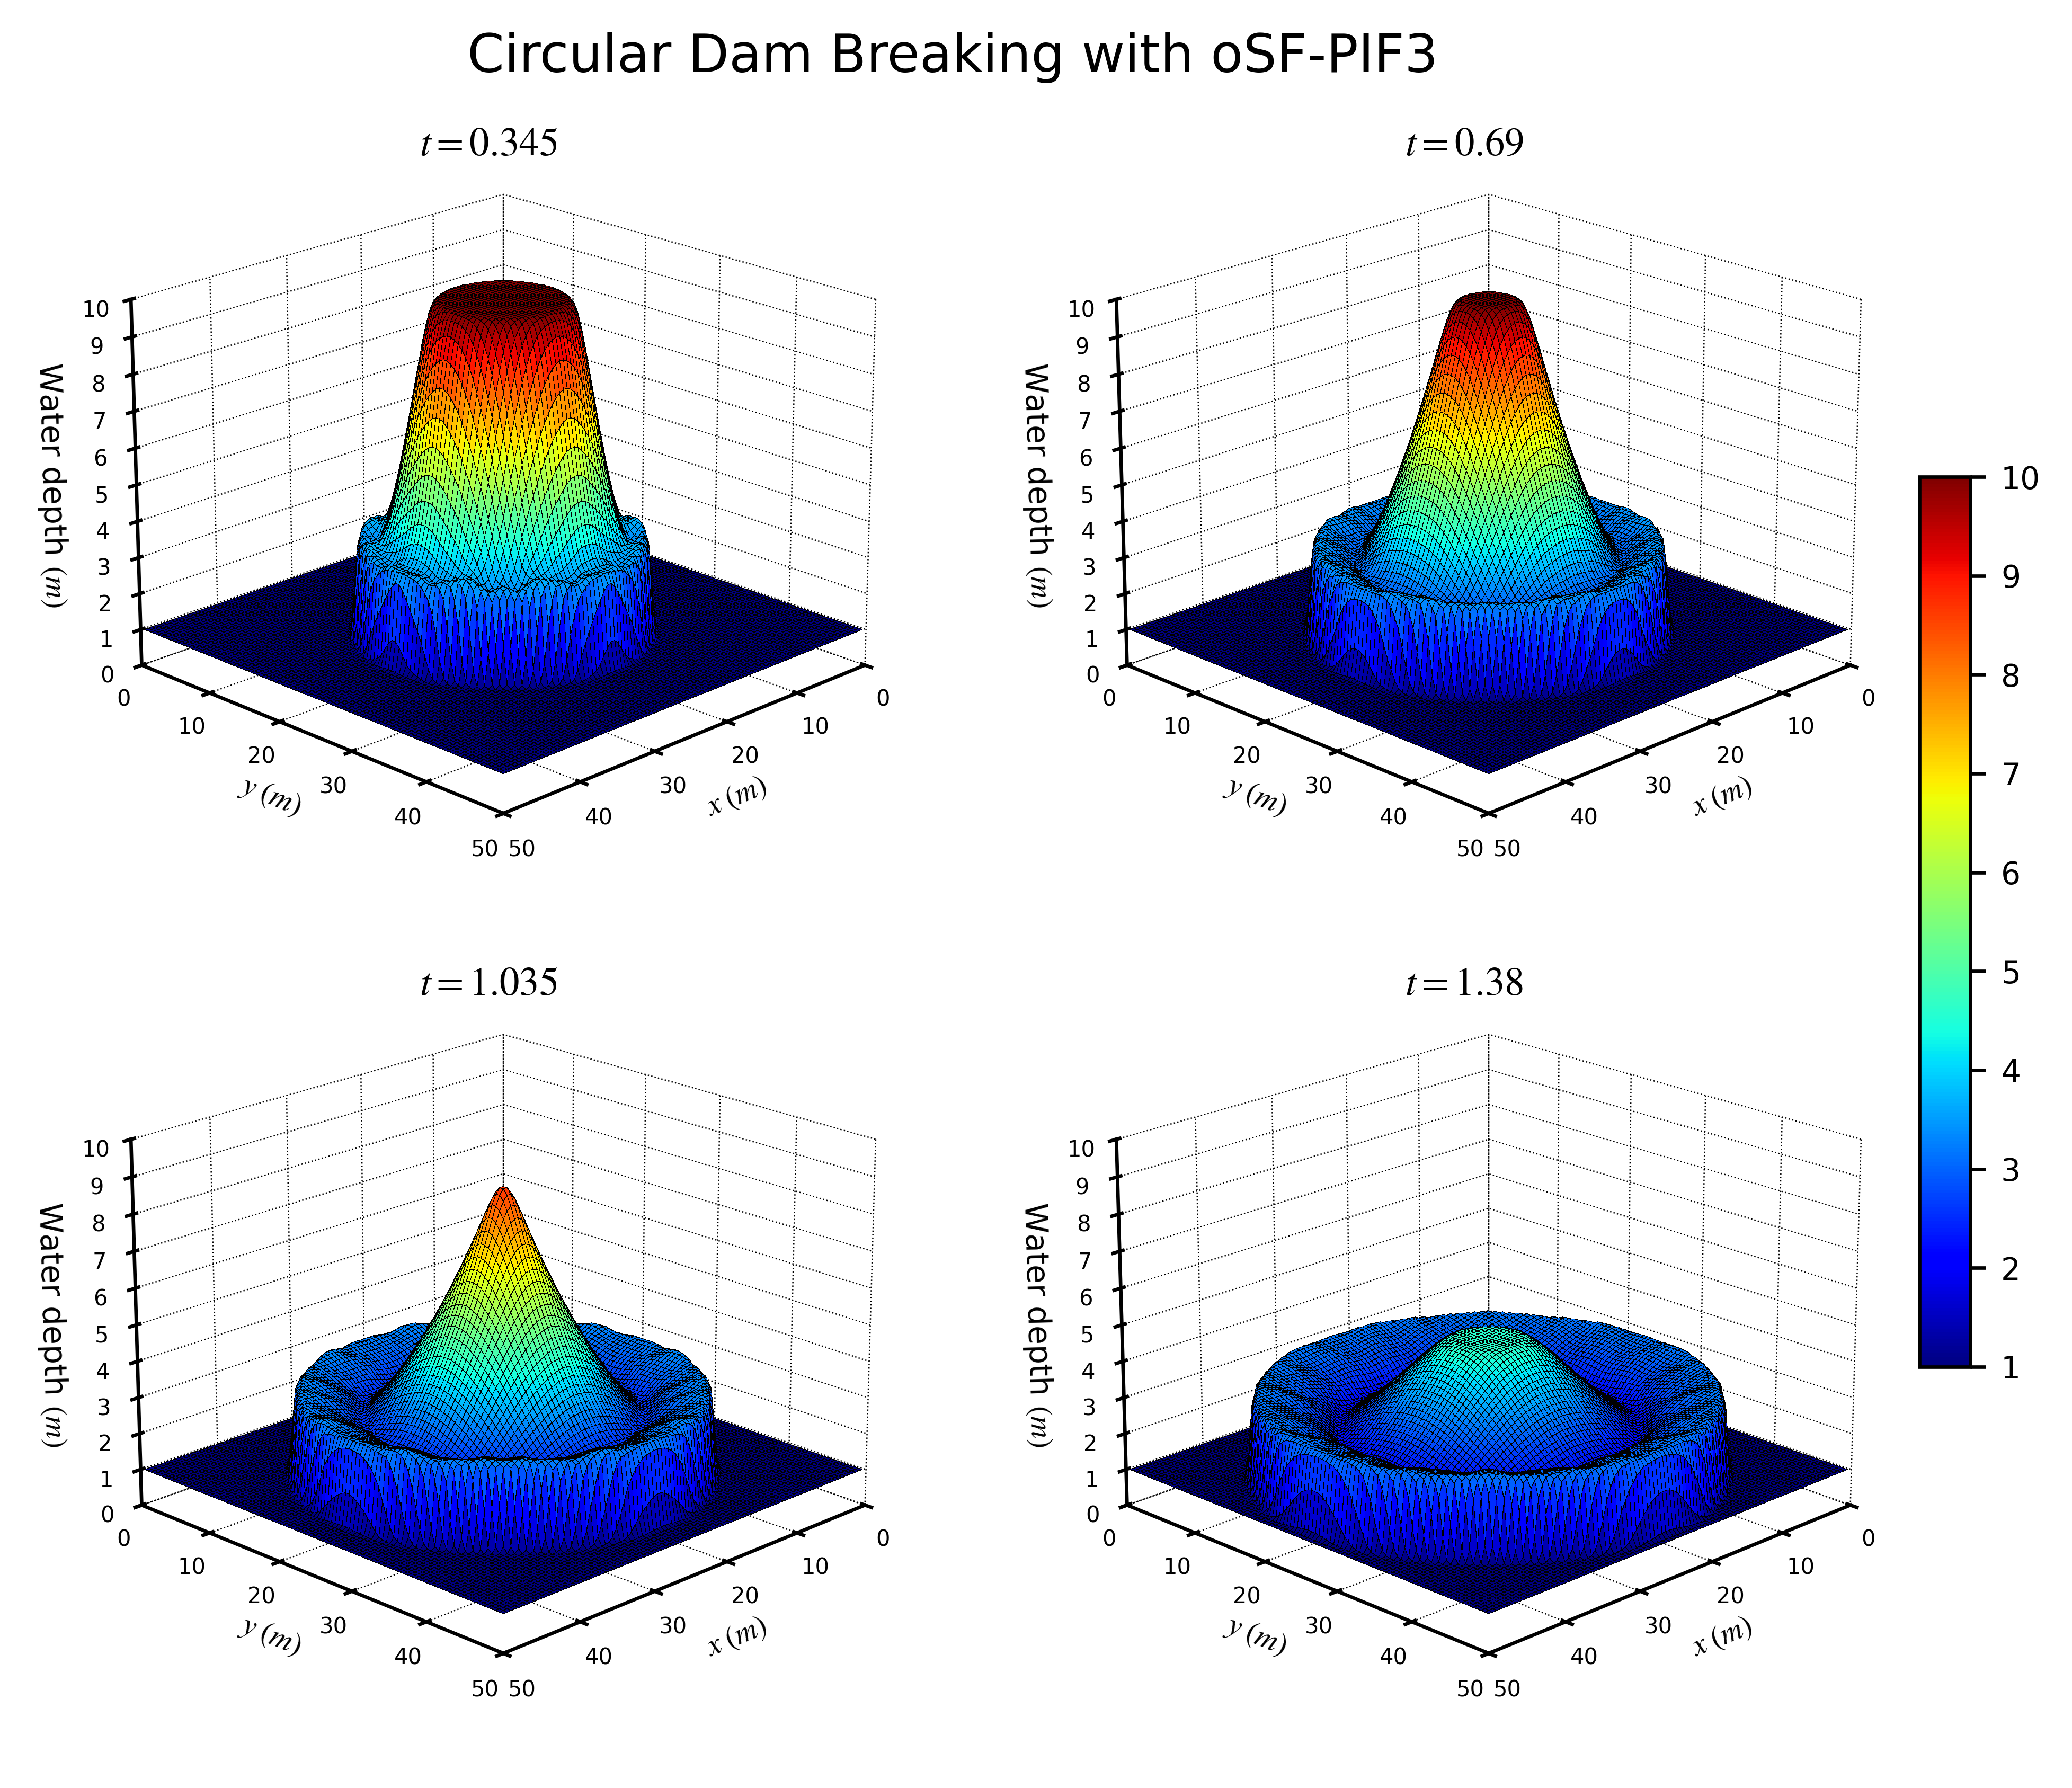

In [5]:
# plot heights
var = 'hght'

# get variable data
var_data1 = slug.get_data(sf3_1, var)
var_data2 = slug.get_data(sf3_2, var)
var_data3 = slug.get_data(sf3_3, var)
var_data4 = slug.get_data(sf3_4, var)

fig = plt.figure(figsize=(8,7), dpi=600)
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')



## now draw the axes
grid_width = 0.3
grid_style = ':'
grid_color = 'black'

# configure 3d axes

for ax in (ax1, ax2, ax3, ax4):
    for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
        axis.pane.fill = False  #delete grey background
        axis.pane.set_edgecolor('w')  #delete outlines
    
        # making dotted grid
        axis._axinfo["grid"]['linewidth'] = grid_width
        axis._axinfo["grid"]['linestyle'] = grid_style
        axis._axinfo["grid"]['color'] = grid_color

        axis.labelpad=-10

    ax.set_xlim(0.0, 50.0)
    ax.set_ylim(0.0, 50.0)
    ax.set_zlim(0.0, 10.0)

    # ticks
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.set_yticks([0, 10, 20, 30, 40, 50])
    ax.set_zticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    ax.tick_params(axis='both', which='major', labelsize=5, pad=-3.5)

    ax.set_xlabel(r'$x\;(m)$', fontsize=7)
    ax.set_ylabel(r'$y\;(m)$', fontsize=7)
    ax.set_zlabel('Water depth ' + r'$(m)$', fontsize=7)
    
    # angle of view
    ax.view_init(20, 45)

# ax1.set_title(r'$t = 0.345$', fontsize=9)
# ax2.set_title(r'$t = 0.69$', fontsize=9)
# ax3.set_title(r'$t = 1.035$', fontsize=9)
# ax4.set_title(r'$t = 1.38$', fontsize=9)

ax1.text(60, 50, 17, r'$t = 0.345$', fontsize=9)
ax2.text(60, 50, 17, r'$t = 0.69$', fontsize=9)
ax3.text(60, 50, 17, r'$t = 1.035$', fontsize=9)
ax4.text(60, 50, 17, r'$t = 1.38$', fontsize=9)



# surface plot
im1 = ax1.plot_surface(sf3_1.x, sf3_1.y, var_data1, cmap=cm.jet,\
                     rstride=1, cstride=1, \
                     antialiased=False, shade=True, \
                     linewidth=.01, edgecolors='black', alpha=1, \
                     vmin=vmin, vmax=vmax\
                    )

im2 = ax2.plot_surface(sf3_2.x, sf3_2.y, var_data2, cmap=cm.jet,\
                     rstride=1, cstride=1, \
                     antialiased=False, shade=True, \
                     linewidth=.01, edgecolors='black', alpha=1, \
                     vmin=vmin, vmax=vmax\
                    )

im3 = ax3.plot_surface(sf3_3.x, sf3_3.y, var_data3, cmap=cm.jet,\
                     rstride=1, cstride=1, \
                     antialiased=False, shade=True, \
                     linewidth=.01, edgecolors='black', alpha=1, \
                     vmin=vmin, vmax=vmax\
                    )

im4 = ax4.plot_surface(sf3_4.x, sf3_4.y, var_data4, cmap=cm.jet,\
                     rstride=1, cstride=1, \
                     antialiased=False, shade=True, \
                     linewidth=.01, edgecolors='black', alpha=1, \
                     vmin=vmin, vmax=vmax\
                    )

# colorbar
cb_ax = fig.add_axes([0.88, 0.3, 0.02, 0.4])
cb1 = fig.colorbar(im4, cax=cb_ax, pad=-.05, shrink=0.5)
cb1.ax.tick_params(labelsize=7)
# cb2 = fig.colorbar(im4, pad=-.05, shrink=0.5)
# cb2.ax.tick_params(labelsize=7)

fig.subplots_adjust(wspace=0.0, hspace=0.0)

fig.suptitle('Circular Dam Breaking with oSF-PIF3', y=0.9)

# tight drawing
# plt.tight_layout(pad=0)
# fig.tight_layout(rect=[0, 0.0, 1, 0.95])


fig.savefig('./swe_circ_osf3_all.png', bbox_inches='tight', pad_inches=0)